In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fiona
from shapely.geometry import shape, Point
import geopandas as gpd
%matplotlib inline

# 2.0 Get the Neighborhoods by GPS
First I get the location ID with the lat and long from the linking file

In [13]:
idlink = pd.read_pickle('/home/michael/chicagohealthinspections/data/idlink.pkl')

In [16]:
geo = idlink[['LocId','Latitude','Longitude']]
geo.head()

,LocId,Latitude,Longitude
0,1,41.932657,-87.713056
1,2,41.924508,-87.733980
2,3,41.954032,-87.707720
3,5,41.950073,-87.727657
4,7,41.984011,-87.775172


Using Geopandas, I then convert those points into a geoDataFrame

In [19]:
geometry = [Point(xy) for xy in zip(geo.Longitude, geo.Latitude)]
geo = geo.drop(['Longitude', 'Latitude'], axis=1)
crs = {'init': 'epsg:4326'}
loc = gpd.GeoDataFrame(geo, crs=crs, geometry=geometry)

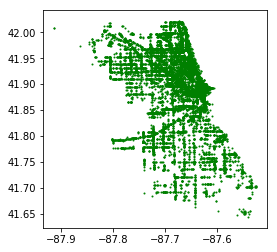

In [44]:
loc.plot(color='green',markersize=1);

Then I load the neighborhood shapefiles and convert them to normal coordinates

In [53]:
neighborhoods = gpd.read_file('/home/michael/Downloads/Neighborhoods_2012/Neighborhoods_2012b.shp')
neighborhoods = neighborhoods.to_crs({'init': 'epsg:4326'})

In [54]:
neighborhoods.head()

,PRI_NEIGH,SEC_NEIGH,SHAPE_AREA,SHAPE_LEN,geometry
0,Grand Boulevard,BRONZEVILLE,4.849250e+07,28196.837157,POLYGON ((-87.60670812560362 41.81681377137388...
1,Printers Row,PRINTERS ROW,2.162138e+06,6864.247156,POLYGON ((-87.62760697485339 41.87437097785366...
2,United Center,UNITED CENTER,3.252051e+07,23101.363745,POLYGON ((-87.66706868914592 41.88885187769542...
3,Sheffield & DePaul,SHEFFIELD & DEPAUL,1.048259e+07,13227.049745,POLYGON ((-87.65833494805523 41.92166144229179...
4,Humboldt Park,HUMBOLDT PARK,1.250104e+08,46126.751351,POLYGON ((-87.74059567509258 41.88782316893226...


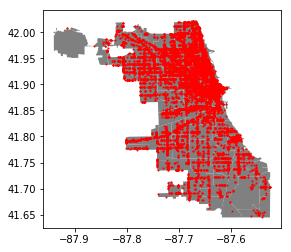

In [57]:
fig, ax = plt.subplots()

ax.set_aspect('equal')
neighborhoods.geometry.plot(ax=ax, color='grey')
loc.plot(ax=ax, marker='o', color='red', markersize=1)
plt.show();

In [58]:
hoodloc = gpd.sjoin(loc, neighborhoods, how='inner', op='intersects')

In [62]:
hoodloc.head()

,LocId,geometry,index_right,PRI_NEIGH,SEC_NEIGH,SHAPE_AREA,SHAPE_LEN
0,1,POINT (-87.71305610116421 41.93265693660558),21,Avondale,"IRVING PARK,AVONDALE",5.529060e+07,34261.933404
23,62,POINT (-87.72201223506437 41.93811658393101),21,Avondale,"IRVING PARK,AVONDALE",5.529060e+07,34261.933404
35,84,POINT (-87.700535765616 41.94655282616904),21,Avondale,"IRVING PARK,AVONDALE",5.529060e+07,34261.933404
100,188,POINT (-87.72707113046459 41.94034702113589),21,Avondale,"IRVING PARK,AVONDALE",5.529060e+07,34261.933404
143,265,POINT (-87.71589988857131 41.93439289450315),21,Avondale,"IRVING PARK,AVONDALE",5.529060e+07,34261.933404


In [65]:
linkloc = pd.merge(idlink,hoodloc[['LocId','PRI_NEIGH']],how='inner')

In [66]:
linkloc.head()

,DBA Name,Address,Latitude,Longitude,LocId,id,PRI_NEIGH
0,TAQUERIA EL RANCHITO,2829 N MILWAUKEE AVE,41.932657,-87.713056,1,el-ranchito-restaurant-chicago-5,Avondale
1,EL TACONAZO JR.,4256 W FULLERTON AVE,41.924508,-87.733980,2,el-taconazo-chicago-4,Hermosa
2,BRICK HOUSE BAR AND GRILL,3152-3154 W IRVING PARK RD,41.954032,-87.707720,3,brick-house-cafe-chicago,Irving Park
3,SMOQUE BBQ,3800 N PULASKI RD,41.950073,-87.727657,5,smoque-bbq-chicago,Irving Park
4,GALA BANQUETS,5639 N MILWAUKEE AVE,41.984011,-87.775172,7,gala-banquets-chicago,Jefferson Park


In [67]:
linkloc.to_pickle('/home/michael/chicagohealthinspections/data/linkloc.pkl')

In [71]:
businfodf = pd.read_pickle('/home/michael/chicagohealthinspections/data/businessinfo.pkl')

In [74]:
businfodf = businfodf.drop_duplicates(subset = 'id')
businfodf

,categories,coordinates.latitude,coordinates.longitude,display_phone,error.code,error.description,hours,id,image_url,is_claimed,...,location.state,location.zip_code,name,phone,photos,price,rating,review_count,transactions,url
0,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...",41.932760,-87.712900,(773) 227-1688,NaN,NaN,"[{'open': [{'is_overnight': True, 'start': '00...",el-ranchito-restaurant-chicago-5,https://s3-media4.fl.yelpcdn.com/bphoto/yVbkID...,True,...,IL,60618,El Ranchito Restaurant,+17732271688,[https://s3-media4.fl.yelpcdn.com/bphoto/yVbkI...,$,2.0,320.0,"[delivery, pickup]",https://www.yelp.com/biz/el-ranchito-restauran...
0,"[{'alias': 'tacos', 'title': 'Tacos'}]",41.924748,-87.714682,(773) 278-8944,NaN,NaN,"[{'open': [{'is_overnight': True, 'start': '08...",el-taconazo-chicago-4,https://s3-media3.fl.yelpcdn.com/bphoto/p9_vHn...,False,...,IL,60639,El Taconazo,+17732788944,[https://s3-media3.fl.yelpcdn.com/bphoto/p9_vH...,$,3.5,36.0,"[delivery, pickup]",https://www.yelp.com/biz/el-taconazo-chicago-4...
0,"[{'alias': 'tradamerican', 'title': 'American ...",41.954235,-87.707764,(773) 588-5558,NaN,NaN,NaN,brick-house-cafe-chicago,https://s3-media1.fl.yelpcdn.com/bphoto/RkMUPl...,False,...,IL,60618,Brick House Cafe,+17735885558,[https://s3-media1.fl.yelpcdn.com/bphoto/RkMUP...,$,4.5,15.0,[],https://www.yelp.com/biz/brick-house-cafe-chic...
0,"[{'alias': 'bbq', 'title': 'Barbeque'}]",41.950210,-87.727950,(773) 545-7427,NaN,NaN,"[{'open': [{'is_overnight': False, 'start': '1...",smoque-bbq-chicago,https://s3-media4.fl.yelpcdn.com/bphoto/a_qNUn...,True,...,IL,60641,Smoque BBQ,+17735457427,[https://s3-media4.fl.yelpcdn.com/bphoto/a_qNU...,$$,4.5,3683.0,[],https://www.yelp.com/biz/smoque-bbq-chicago?ad...
0,"[{'alias': 'catering', 'title': 'Caterers'}, {...",41.984060,-87.774910,(773) 792-2262,NaN,NaN,"[{'open': [{'is_overnight': False, 'start': '0...",gala-banquets-chicago,https://s3-media1.fl.yelpcdn.com/bphoto/8_fV1a...,True,...,IL,60646,Gala Banquets,+17737922262,[https://s3-media1.fl.yelpcdn.com/bphoto/8_fV1...,NaN,5.0,17.0,[],https://www.yelp.com/biz/gala-banquets-chicago...
0,"[{'alias': 'grocery', 'title': 'Grocery'}]",41.997585,-87.691743,(773) 764-3737,NaN,NaN,NaN,mehrab-chicago,https://s3-media3.fl.yelpcdn.com/bphoto/HDrilh...,False,...,IL,60659,Mehrab,+17737643737,[https://s3-media3.fl.yelpcdn.com/bphoto/HDril...,$$,3.0,3.0,[],https://www.yelp.com/biz/mehrab-chicago?adjust...
0,"[{'alias': 'breakfast_brunch', 'title': 'Break...",41.959579,-87.708003,(773) 961-7023,NaN,NaN,"[{'open': [{'is_overnight': False, 'start': '0...",cafe-san-juan-chicago,https://s3-media3.fl.yelpcdn.com/bphoto/Vo0_9i...,True,...,IL,60618,Cafe San Juan,+17739617023,[https://s3-media3.fl.yelpcdn.com/bphoto/Vo0_9...,$$,4.5,44.0,"[pickup, delivery]",https://www.yelp.com/biz/cafe-san-juan-chicago...
0,"[{'alias': 'cuban', 'title': 'Cuban'}, {'alias...",41.924415,-87.742347,(773) 227-1020,NaN,NaN,"[{'open': [{'is_overnight': False, 'start': '0...",señor-pan-cafe-chicago-4,https://s3-media4.fl.yelpcdn.com/bphoto/ee5mRG...,True,...,IL,60639,Señor Pan Cafe,+17732271020,[https://s3-media4.fl.yelpcdn.com/bphoto/ee5mR...,$,4.0,422.0,"[delivery, pickup]",https://www.yelp.com/biz/se%C3%B1or-pan-cafe-c...
0,"[{'alias': 'mexican', 'title': 'Mexican'}]",41.908806,-87.726135,(773) 276-5825,NaN,NaN,"[{'open': [{'is_overnight': True, 'start': '08...",pozoleria-san-juan-chicago,https://s3-media1.fl.yelpcdn.com/bphoto/VbLUlu...,True,...,IL,60651,Pozoleria San Juan,+17732765825,[https://s3-media1.fl.yelpcdn.com/bphoto/VbLUl...,$,3.5,62.0,[],https://www.yelp.com/biz/pozoleria-san-juan-ch...
0,"[{'alias': 'sandwiches', 'title': 'Sandwiches'...",41.865590,-87.626230,(312) 427-5507,NaN,NaN,NaN,subway-chicago-44,https://s3-media1.fl.yelpcdn.com/bphoto/YvJFH6...,False,...,IL,60605,Subway,+13124275507,[https://s3-media1.fl.yelpcdn.com/bphoto/YvJFH...,$,3.0,9.0,"[delivery, pickup]",https://www.yelp.com/biz/subway-chicago-44?adj...
